# Hora de praticar

Agora é sua vez de colocar a mão na massa! Em grupos, respondam as seguintes perguntas sobre os dados:

1. Quantos usuários utilizam a Netflix pelo Tablet?
2. Qual é a representatividade (em %) do sistema operacional(device) mais utilizado para assistir Netflix?
3. Crie visualizações que responda as seguintes perguntas:
    1. Qual é o sistema operacional mais usado para cada faixa etária? Existe algum padrão? O tipo de aparelho muda de acordo com o grupo de idade?
    2. No Brasil, qual é o sistema operacional mais utilizado?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando os dados da Netflix
df_netflix = pd.read_csv('netflix.csv')
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [3]:
# Verificando as informações do df
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [4]:
# Verificando se há dados nulos
df_netflix.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [5]:
df_netflix.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,2500.0,1250.5000,721.832160,1.0,625.75,1250.5,1875.25,2500.0
Monthly Revenue,2500.0,12.5084,1.686851,10.0,11.00,12.0,14.00,15.0
Age,2500.0,38.7956,7.171778,26.0,32.00,39.0,45.00,51.0


In [6]:
df_netflix.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,2500.0,NaN,NaN,NaN,1250.5,721.83216,1.0,625.75,1250.5,1875.25,2500.0
Subscription Type,2500,3,Basic,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Revenue,2500.0,NaN,NaN,NaN,12.5084,1.686851,10.0,11.0,12.0,14.0,15.0
Join Date,2500,300,05-11-22,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Payment Date,2500,26,28-06-23,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,2500,10,United States,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2500.0,NaN,NaN,NaN,38.7956,7.171778,26.0,32.0,39.0,45.0,51.0
Gender,2500,2,Female,1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Device,2500,4,Laptop,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plan Duration,2500,1,1 Month,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# convertendo o tipo de dados para data
df_netflix['Last Payment Date'] = pd.to_datetime(df_netflix['Last Payment Date'])
df_netflix['Join Date'] = pd.to_datetime(df_netflix['Join Date'])
df_netflix

C:\Users\Ellen\AppData\Local\Temp\ipykernel_12344\3513216386.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_netflix['Last Payment Date'] = pd.to_datetime(df_netflix['Last Payment Date'])
C:\Users\Ellen\AppData\Local\Temp\ipykernel_12344\3513216386.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_netflix['Join Date'] = pd.to_datetime(df_netflix['Join Date'])


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


In [8]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [9]:
# há quanto tempo as pessoas estão inscritas na Netflix?
df_netflix['duracao_assinatura'] = df_netflix['Last Payment Date'] - df_netflix['Join Date']
df_netflix['duracao_assinatura'] = df_netflix['duracao_assinatura'].dt.days
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364


In [10]:
# Com base na função describe() percebemos que a média de tempo que as pessoas se inscrevem é de cerca de 326 dias, quase um ano.
# Mas, pera aí, o que são esse números negativos no minimo?
df_netflix.describe().T

,count,mean,min,25%,50%,75%,max,std
User ID,2500.0,1250.5,1.0,625.75,1250.5,1875.25,2500.0,721.83216
Monthly Revenue,2500.0,12.5084,10.0,11.0,12.0,14.0,15.0,1.686851
Join Date,2500,2022-07-30 08:06:43.200000,2021-05-09 00:00:00,2022-06-15 00:00:00,2022-08-07 00:00:00,2022-10-09 00:00:00,2023-12-01 00:00:00,NaN
Last Payment Date,2500,2023-06-21 10:33:36,2023-01-07 00:00:00,2023-05-07 00:00:00,2023-06-28 00:00:00,2023-08-07 00:00:00,2023-12-07 00:00:00,NaN
Age,2500.0,38.7956,26.0,32.0,39.0,45.0,51.0,7.171778
duracao_assinatura,2500.0,326.102,-159.0,247.0,331.0,401.25,776.0,118.638034


In [11]:
# vamos validar esses numeros?
df_netflix[(df_netflix['duracao_assinatura'] < 0)]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
9,10,Premium,15,2023-07-01,2023-06-22,Italy,44,Female,Smart TV,1 Month,-9
14,15,Standard,12,2023-09-05,2023-06-28,Germany,38,Female,Smart TV,1 Month,-69
20,21,Premium,15,2023-10-06,2023-06-22,United States,26,Female,Laptop,1 Month,-106
34,35,Basic,10,2023-11-04,2023-06-28,Germany,39,Female,Smart TV,1 Month,-129
39,40,Basic,10,2023-07-03,2023-06-22,Italy,48,Male,Tablet,1 Month,-11
60,61,Premium,15,2023-08-02,2023-06-22,United States,28,Female,Laptop,1 Month,-41
69,70,Basic,10,2023-08-05,2023-06-22,Italy,41,Male,Smartphone,1 Month,-44
80,81,Premium,10,2023-11-01,2023-06-24,United States,37,Male,Tablet,1 Month,-130
108,109,Standard,13,2023-08-02,2023-06-25,Spain,35,Female,Tablet,1 Month,-38
129,130,Basic,14,2023-07-01,2023-06-23,Italy,43,Female,Tablet,1 Month,-8


In [12]:
# Verificando a quantidade de números negativos
numero_usuarios_negativos = df_netflix[df_netflix['duracao_assinatura'] < 0]['User ID'].count()
print(f"Número de usuários com duração negativa: {numero_usuarios_negativos}")

Número de usuários com duração negativa: 13


In [13]:
13/2500

0.0052

In [14]:
# Encontramos valores inconsistentes, onde o dado não faz sentido. Como não possuímos contexto suficiente sobre essa tabela para entender
# o motivo de termos dt_ultimo_pagamento maior que dt_assinatura, iremos retirar essas linhas para não enviezar nossos resultados.
df_netflix = df_netflix.drop(df_netflix[df_netflix['duracao_assinatura'] < 0].index)
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364


In [15]:
# Agora sim, tirando os dados negativos, nossa média de duração de assinatura subiu um pouco, e agora podemos visualizar que o tempo mínimo
# que as pessoas assinam a netflix é de 8 dias, e o máximo da base é 776 dias.
df_netflix.describe().T

,count,mean,min,25%,50%,75%,max,std
User ID,2487.0,1256.586651,1.0,635.5,1257.0,1878.5,2500.0,718.761045
Monthly Revenue,2487.0,12.509047,10.0,11.0,12.0,14.0,15.0,1.685147
Join Date,2487,2022-07-28 06:04:11.869722368,2021-05-09 00:00:00,2022-06-14 00:00:00,2022-08-05 00:00:00,2022-10-08 00:00:00,2023-06-14 00:00:00,NaN
Last Payment Date,2487,2023-06-21 10:12:35.609167616,2023-01-07 00:00:00,2023-05-07 00:00:00,2023-06-28 00:00:00,2023-08-07 00:00:00,2023-12-07 00:00:00,NaN
Age,2487.0,38.808605,27.0,32.0,39.0,45.0,51.0,7.172535
duracao_assinatura,2487.0,328.172497,8.0,249.0,331.0,402.0,776.0,115.368881


In [16]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2487 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   User ID             2487 non-null   int64         
 1   Subscription Type   2487 non-null   object        
 2   Monthly Revenue     2487 non-null   int64         
 3   Join Date           2487 non-null   datetime64[ns]
 4   Last Payment Date   2487 non-null   datetime64[ns]
 5   Country             2487 non-null   object        
 6   Age                 2487 non-null   int64         
 7   Gender              2487 non-null   object        
 8   Device              2487 non-null   object        
 9   Plan Duration       2487 non-null   object        
 10  duracao_assinatura  2487 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 233.2+ KB


In [17]:
# Antes de continuarmos nossa análise, existe mais um passo que devemos fazer: resetar o index. Como retiramos algumas linhas da nossa tabela, o
# índice, ou seja, coluna mais à esquerda, porem ela ainda está com o intervalo de 1-2499.
df_netflix = df_netflix.reset_index(drop=True)
df_netflix

# agora sim! nossa coluna de index está coerente. Vamos continuar!

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174
...,...,...,...,...,...,...,...,...,...,...,...
2482,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500
2483,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462
2484,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310
2485,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364


In [18]:
# outra análise interessante de se fazer, será que existe um mês com um maior número de vendas?
df_netflix['dt_mes'] = df_netflix['Join Date'].dt.month
df_netflix['dt_mes'].value_counts()

dt_mes
10    417
7     393
6     338
9     305
8     292
5     135
11    119
4     108
3     103
12     97
2      92
1      88
Name: count, dtype: int64

In [19]:
# Utilizando a função value_counts() conseguimos ter uma ideia de qual é a assinatura mais comum, porém, em números absolutos
# é dificil entender a proporção entre os 3 planos.
df_netflix["Subscription Type"].value_counts()

Subscription Type
Basic       994
Standard    764
Premium     729
Name: count, dtype: int64

In [20]:
# Para isso, colocamos um parâmetro dentro da nossa função, e ele nos devolve os valores em porcentagem sobre o total.
df_netflix["Subscription Type"].value_counts(normalize=True)

# daqui, percebemos que o pacote mais recorrente é o Basic.

Subscription Type
Basic       0.399678
Standard    0.307197
Premium     0.293124
Name: proportion, dtype: float64

In [21]:
# Vamos entender também, quais sao os países com o maior número de assinaturas: em valor absoluto
df_netflix["Country"].value_counts()

Country
Spain             450
United States     448
Canada            317
France            183
Brazil            183
Mexico            183
United Kingdom    182
Australia         182
Germany           181
Italy             178
Name: count, dtype: int64

In [22]:
# Vamos entender também, quais sao os países com o maior número de assinaturas: em percentual
df_netflix["Country"].value_counts(normalize=True)

Country
Spain             0.180941
United States     0.180137
Canada            0.127463
France            0.073583
Brazil            0.073583
Mexico            0.073583
United Kingdom    0.073181
Australia         0.073181
Germany           0.072778
Italy             0.071572
Name: proportion, dtype: float64

In [23]:
# Vamos criar intervalos de idade para entender melhor nossos usuários?
# Iremos criar categorias de idades com o intervalo de 4 em 4 anos.
# ou seja, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, +60

df_netflix.loc[df_netflix['Age'] < 25, 'grupo_idade'] = '20-24'
df_netflix.loc[(df_netflix['Age'] >= 25) & (df_netflix['Age'] < 30), 'grupo_idade'] = '25-29'
df_netflix.loc[(df_netflix['Age'] >= 30) & (df_netflix['Age'] < 35), 'grupo_idade'] = '30-34'
df_netflix.loc[(df_netflix['Age'] >= 35) & (df_netflix['Age'] < 40), 'grupo_idade'] = '35-39'
df_netflix.loc[(df_netflix['Age'] >= 40) & (df_netflix['Age'] < 45), 'grupo_idade'] = '40-44'
df_netflix.loc[(df_netflix['Age'] >= 45) & (df_netflix['Age'] < 50), 'grupo_idade'] = '45-49'
df_netflix.loc[(df_netflix['Age'] >= 50) & (df_netflix['Age'] < 55), 'grupo_idade'] = '50-54'
df_netflix.loc[(df_netflix['Age'] >= 55) & (df_netflix['Age'] < 60), 'grupo_idade'] = '55-59'
df_netflix.loc[df_netflix['Age'] >= 60, 'grupo_idade'] = '60+'
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura,dt_mes,grupo_idade
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629,1,25-29
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774,5,35-39
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,2,40-44
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262,10,50-54
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174,1,30-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500,7,25-29
2483,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462,4,30-34
2484,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310,9,35-39
2485,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364,12,45-49


In [24]:
# com o grupo de idades feito, qual será a faixa etária mais recorrente?
df_netflix["grupo_idade"].value_counts()

grupo_idade
35-39    512
30-34    502
45-49    496
40-44    496
25-29    304
50-54    177
Name: count, dtype: int64

# Exercicio parte 1

# 1. Quantos usuários utilizam a Netflix pelo Tablet?

Resposta: 629 usuários usam o tablet para acessar a Netflix.

In [25]:
# Verificando as opções de dispositivos
df_netflix['Device'].value_counts()

Device
Laptop        632
Tablet        629
Smartphone    619
Smart TV      607
Name: count, dtype: int64

# 2. Qual é a representatividade (em %) do sistema operacional(device) mais utilizado para assistir Netflix?

Resposta: 25,41% dos usuários usam o laptop para acessar o Netflix.


In [26]:
# Verificano a representatividade em % normalizando
df_netflix['Device'].value_counts(normalize=True)

Device
Laptop        0.254121
Tablet        0.252915
Smartphone    0.248894
Smart TV      0.244069
Name: proportion, dtype: float64

3. Crie visualizações que responda as seguintes perguntas:

1. Qual é o sistema operacional mais usado para cada faixa etária? Existe algum padrão? O tipo de aparelho muda de acordo com o grupo de idade?   

Reposta:  Análisando o uso dos dispositivos por faixa etária, podemos identificar que ambas usam os 4 tipos de dispositivo, porém a maioria preferem o laptop independente da faixa etária.

In [27]:
#Agrupadando as duas colunas 'grupo_idade' e 'Device' para ver os valores
# O método size() é utilizado para retornar o número total de elementos (células).
df_netflix.groupby(['grupo_idade', 'Device']).size()

grupo_idade  Device    
25-29        Laptop         70
             Smart TV       76
             Smartphone     77
             Tablet         81
30-34        Laptop        117
             Smart TV      135
             Smartphone    118
             Tablet        132
35-39        Laptop        133
             Smart TV      122
             Smartphone    134
             Tablet        123
40-44        Laptop        147
             Smart TV       99
             Smartphone    132
             Tablet        118
45-49        Laptop        117
             Smart TV      131
             Smartphone    119
             Tablet        129
50-54        Laptop         48
             Smart TV       44
             Smartphone     39
             Tablet         46
dtype: int64

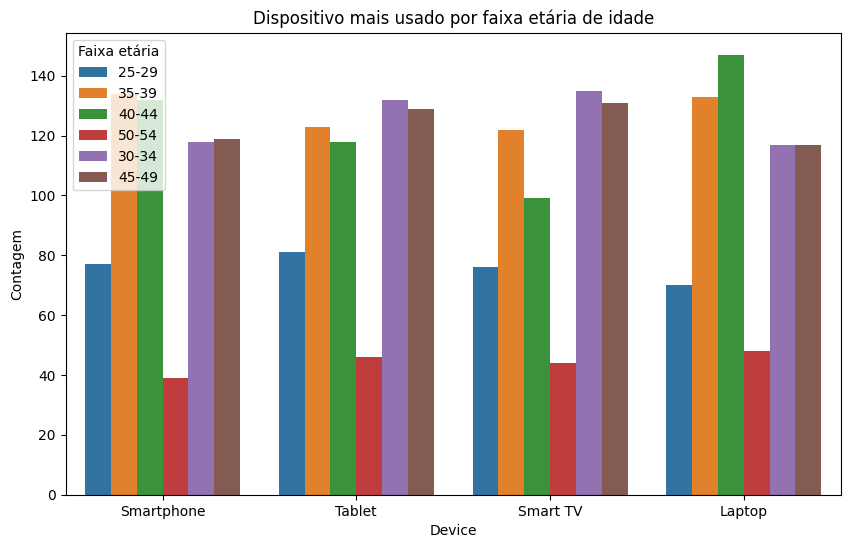

In [28]:
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_netflix,
              x = 'Device',
              hue = 'grupo_idade')

# definir o título e eixos x e y
plt.title('Dispositivo mais usado por faixa etária de idade')
plt.xlabel('Device')
plt.ylabel('Contagem')

# definir texto da legenda
plt.legend(title = 'Faixa etária')

plt.show()

2. No Brasil, qual é o sistema operacional mais utilizado?

Resposta: O sistema mais utilizado no Brasil é o Smartphone.

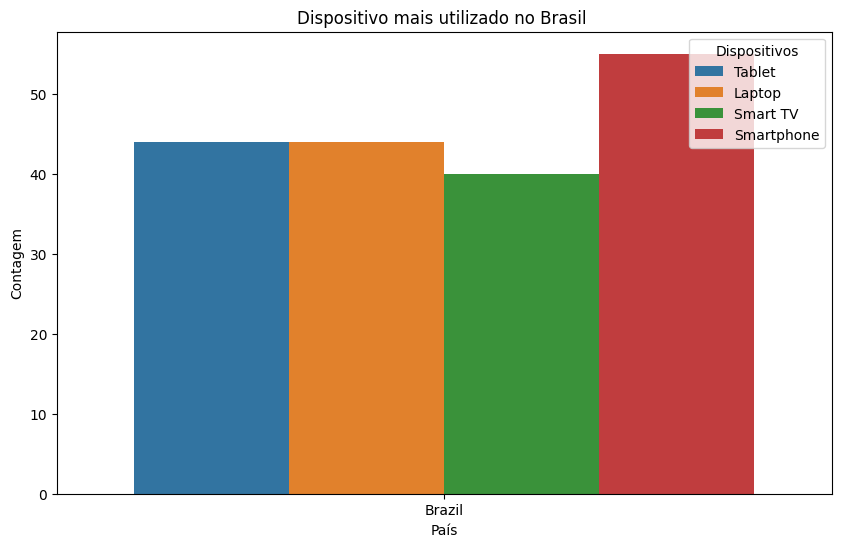

In [16]:
# Filtrando os dados para o Brasil
df_brazil = df_netflix[df_netflix['Country'] == 'Brazil']

plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_brazil,
              x = 'Country',
              hue = 'Device')

# definir o título e eixos x e y
plt.title('Dispositivo mais utilizado no Brasil ')
plt.xlabel('País')
plt.ylabel('Contagem')

# definir texto da legenda
plt.legend(title = 'Dispositivos')

plt.show()